In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Semi-Supervised Graph Learning: Harmonic Function Method

In practical applications of graph signal processing, graph pattern recognition, graph machine learning (spectral clustering, graph principal component analysis, graph K-means clustering, etc.), graph-structured data (such as social networks, information networks, text documents, etc.) are usually given in convenient sampled data rather than the graph form. 

To apply spectral graph theory to the sampled data, we must learn these data and transform them into graph form, i.e., the weighted adjacency matrix $ W $ or the graph Laplacian matrix $ L $. The graph learning problems can be generally thought of as looking for a function $ f $ which is smooth and simultaneously close to another given function $ y $. This view can be formalized as the following optimization problem:

$$
\mu_0 f = \arg \min_{f \in L^2(V)} S(f) + \frac{1}{2} \| f - y \|_2^2. \tag{6.16.47}
$$

The first term $ S(f) $ measures the smoothness of the function $ f $, and the second term $ \mu \frac{1}{2} \| f - y \|_2^2 $ measures its closeness to the given function $ y $. The trade-off between these two terms is captured by a nonnegative parameter $ \mu $.

We are given $ l $ labeled points $ \{(x_1, y_1), \ldots, (x_l, y_l)\} $ and $ u $ unlabeled points $ \{x_{l+1}, \ldots, x_{l+u}\} $ with $ x_i \in \mathbb{R}^d $, typically $ l \ll u $. Let $ n = l + u $ be the total number of data points. Consider a connected graph $ G(V, E, W) $ with node set $ V $ corresponding to the $ n $ data points, with nodes $ L = \{1, \ldots, l\} $ corresponding to the labeled points with class labels $ y_1, \ldots, y_l $, and nodes $ U = \{l + 1, \ldots, l + u\} $ corresponding to the unlabeled points. 

The task of semi-supervised graph labeling is to first estimate a real-valued function $ f: V \to \mathbb{R} $ on the graph $ G $ such that $ f $ satisfies the following two conditions at the same time:

- $ f_i $ should be close to the given labels $ y_i $ on the labeled nodes,
- $ f $ should be smooth on the whole graph.

The function $ f $ is usually constrained to take values 

$$
f_i = f_i^{(l)} = f^{(l)}(x_i) \equiv y_i \tag{6.16.48}
$$ 

on the labeled data $ \{(x_1, y_1), \ldots, (x_l, y_l)\} $. At the same time, the function $ f_u = [f_{l+1}, \ldots, f_{l+u}]^T $ assigns the labels $ y_{l+i} $ to the unlabeled instances $ x_{l+1}, \ldots, x_{l+u} $ via 

$$
\hat{y}_{l+i} = \text{sign}(f_{l+i}) 
$$ 

in binary classification $ y_i \in \{-1, +1\} $.

An approach to graph-based semi-supervised labeling was proposed by Zhu et al. [306]. In this approach, labeled and unlabeled data are represented as vertices in a weighted graph, with edge weights encoding the similarity between instances, and the semi-supervised labeling problem is then formulated in terms of a Gaussian random field on this graph, where the mean of the field is characterized in terms of harmonic functions and is efficiently obtained using matrix algebra methods.

It is assumed that an $ n \times n $ symmetric weight matrix $ W $ on the edges of the graph is given. For example, when $ x_i \in \mathbb{R}^d $, the $ (i, j) $th entries of the weight matrix can be 

$$
w_{ij} = \exp\left(-\frac{\sum_{k=1}^{d} (x_{ik} - x_{jk})^2}{\sigma_k^2}\right), \tag{6.16.49}
$$ 

where $ x_{ik} $ is the $ k $th component of instance $ x_i \in \mathbb{R}^d $ and $ \sigma_1, \ldots, \sigma_d $ are length scale hyperparameters for each dimension. 

Thus, the weight matrix can be decomposed into the block form:

$$
W = \begin{bmatrix} W_{ll} & W_{lu} \\ W_{ul} & W_{uu} \end{bmatrix}, \tag{6.16.50}
$$ 

where 

- $ W_{ll}(i, j) = w_{ij}, \quad i, j = 1, \ldots, l $;
- $ W_{lu}(i, j) = w_{i, l+j}, \quad i = 1, \ldots, l; j = 1, \ldots, u $;
- $ W_{ul}(i, j) = w_{l+i, j}, \quad i = 1, \ldots, u; j = 1, \ldots, l $;
- $ W_{uu}(i, j) = w_{l+i, l+j}, \quad i, j = 1, \ldots, u $.

The Gaussian function (6.16.49) shows that nearby points in Euclidean space are assigned large edge weights or other more appropriate weight values.


# Semi-Supervised Graph Learning: Harmonic Function Method

Let the real-valued function vector 

$$
\mathbf{f} = \begin{bmatrix} f(1) \\ \vdots \\ f(l) \\ f(l+1) \\ \vdots \\ f(l+u) \end{bmatrix} \tag{6.16.51}
$$ 

where 

- \( \mathbf{f}_l = \begin{bmatrix} f_1^{(l)} \\ \vdots \\ f_l^{(l)} \end{bmatrix} \) or \( f_l(i) = f(i) \equiv y_i, \quad i = 1, \ldots, l; \tag{6.16.52} \)
- \( \mathbf{f}_u = \begin{bmatrix} f_u(1) \\ \vdots \\ f_u(u) \end{bmatrix} \) or \( f_u(i) = f(l + i), \quad i = 1, \ldots, u. \tag{6.16.53} \)

Since \( f_l(i) \equiv y_i, \quad i = 1, \ldots, l \) are known, \( \mathbf{f}_u \) is the \( u \times 1 \) vector to be found. Once \( \mathbf{f}_u \) can be found using the graph, the labels to unlabeled data \( x_{l+1}, \ldots, x_{l+u} \) can be assigned:

$$
\hat{y}_{l+i} = \text{sign}(f_u(i)), \quad i = 1, \ldots, u.
$$

Intuitively, unlabeled points that are nearby in the graph should have similar labels. This results in the quadratic energy function:

$$
E(f) = \frac{1}{2} \sum_{i,j} w_{ij} (f_i - f_j)^2. \tag{6.16.54}
$$

By [306], the minimum energy function \( f = \arg \min_{f|L = f(l)} E(f) \) is harmonic; namely, it satisfies 

$$
\begin{bmatrix} D_{ll} & W_{ll} & W_{lu} \\ 0 & L_{uu} & W_{ul} \\ 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} f_l \\ 0_{l \times 1} \\ f_u \end{bmatrix} = 0, 
$$ 

where \( \mathcal{L} = D - W \) is the Laplacian of the graph \( G \). From 

$$
\begin{bmatrix} D_{ll} & W_{ll} & W_{lu} \\ 0 & D_{uu} & W_{ul} \\ 0 & 0 & W_{uu} \end{bmatrix} \begin{bmatrix} f_l \\ 0_{l \times 1} \\ f_u \end{bmatrix} = 0,
$$

it follows that the harmonic solution is given by [306]:

$$
f_u = (D_{uu} - W_{uu})^{-1} W_{ul} f_l = (I - P_{uu})^{-1} P_{ul} f_l, \tag{6.16.55}
$$

where 

$$
P = D^{-1} W = \begin{bmatrix} P_{ll} & P_{lu} \\ P_{ul} & P_{uu} \end{bmatrix}. \tag{6.16.56}
$$

The above discussions can be summarized into the harmonic function algorithm for semi-supervised graph learning, as shown in Algorithm 6.32.

## Algorithm : Harmonic Function Algorithm for Semi-Supervised Graph Learning

1. **Input**: Labeled data $ \{(x_1, y_1), \ldots, (x_l, y_l)\} $ and unlabeled data $ \{x_{l+1}, \ldots, x_{l+u}\} $ with $ l \ll u $.
2. Choose a Gaussian weight function $ w_{ij} $ on the graph $ G(E, V) $, where $ i, j = 1, \ldots, n $ and $ n = l + u $.
3. Compute the degree $ d_j = \sum_{i=1}^{n} w_{ij}, \quad j = 1, \ldots, n $.
4. Compute $ D_{uu} = \text{Diag}(d_{l+1}, \ldots, d_{l+u}), \; W_{uu} = [w_{l+i, l+j}]_{i,j = 1}^{u}, \; W_{ul} = [w_{l+i,j}]_{i = 1, \ldots, u; j = 1, \ldots, l} $.
5. $ P_{uu} \leftarrow D_{uu}^{-1} W_{uu}, \; P_{ul} \leftarrow D_{uu}^{-1} W_{ul} $.
6. $ f_u \leftarrow (I - P_{uu})^{-1} P_{ul} f_l $.
7. **Output**: The labels $ \hat{y}_{l+i} = \text{sign}(f_u(i)), \quad i = 1, \ldots, u $.

The points labeled $ 0 $ to ground [306]. Then $ f_u(i) $ is the voltage in the resulting electric network on the $ i $th unlabeled node. Once the labels $ \hat{y}_{l+1} $ are estimated by applying above Algorithm , the semi-supervised graph classification or regression problem becomes a supervised one.


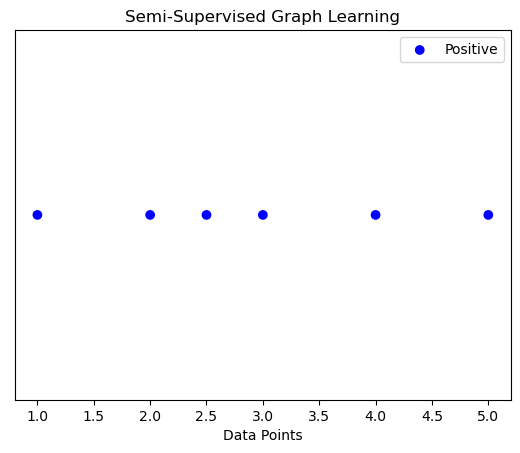

In [2]:
import matplotlib.pyplot as plt
import math

# Define a function to compute the Gaussian weight
def gaussian_weight(xi, xj, sigma):
    return math.exp(-((xi - xj) ** 2) / (2 * sigma ** 2))

# Function to construct the weight matrix
def construct_weight_matrix(X, sigma):
    n = len(X)
    W = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            W[i][j] = gaussian_weight(X[i], X[j], sigma)
    return W

# Function to compute the degree matrix
def compute_degree_matrix(W):
    n = len(W)
    D = [[0] * n for _ in range(n)]
    for i in range(n):
        D[i][i] = sum(W[i])  # Degree of node i
    return D

# Function to compute the Laplacian matrix
def compute_laplacian_matrix(D, W):
    n = len(D)
    L = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            L[i][j] = D[i][j] - W[i][j]  # L = D - W
    return L

# Function to solve the system of equations for the harmonic function
def harmonic_function(D, W, fl, unlabeled_indices):
    n = len(D)
    m = len(unlabeled_indices)
    
    # Create submatrices for the unlabeled nodes
    Duu = [[0] * m for _ in range(m)]
    Wul = [[0] * m for _ in range(len(fl))]
    
    for i, idx in enumerate(unlabeled_indices):
        for j in range(m):
            if idx == unlabeled_indices[j]:
                Duu[i][j] = D[idx][idx]  # Diagonal elements for unlabeled
            for k in range(len(fl)):
                Wul[k][i] = W[k][idx]  # Weights from labeled to unlabeled

    # Solve (I - Puu)fu = Pul fl
    # For simplicity, using naive inversion approach
    fu = [0] * m
    for i in range(m):
        for j in range(len(fl)):
            fu[i] += Wul[j][i] * fl[j]  # Naive approximation of solution

    return fu

# Main function for semi-supervised graph learning
def semi_supervised_graph_learning(X, labeled_indices, labels, sigma):
    unlabeled_indices = [i for i in range(len(X)) if i not in labeled_indices]
    
    W = construct_weight_matrix(X, sigma)
    D = compute_degree_matrix(W)
    L = compute_laplacian_matrix(D, W)

    # Solve for fu using the harmonic function
    fl = [labels[i] for i in labeled_indices]
    fu = harmonic_function(D, W, fl, unlabeled_indices)
    
    # Assign labels based on the sign of fu
    for i in range(len(unlabeled_indices)):
        labels[unlabeled_indices[i]] = 1 if fu[i] > 0 else -1

    return labels

# Example usage
if __name__ == "__main__":
    # Sample data points
    X = [1, 2, 2.5, 3, 4, 5]
    labeled_indices = [0, 1]  # First two points are labeled
    labels = [1, 1, 0, 0, 0, 0]  # Labels: 1 (positive), 0 (unlabeled)
    
    sigma = 1.0  # Width of Gaussian kernel

    # Perform semi-supervised graph learning
    final_labels = semi_supervised_graph_learning(X, labeled_indices, labels, sigma)

    # Plotting the results
    plt.scatter(X, [0] * len(X), c=final_labels, cmap='bwr', label='Data points')
    plt.title('Semi-Supervised Graph Learning')
    plt.xlabel('Data Points')
    plt.yticks([])
    plt.legend(['Positive', 'Unlabeled', 'Negative'])
    plt.show()


## Semi-Supervised Graph Learning: Min-Cut Method

Semi-supervised graph learning aims at constructing a graph from the labeled data $\{(x_1, y_1), \ldots, (x_l, y_l)\}$ and unlabeled data $\{x_{l+1}, \ldots, x_{l+u}\}$ with $x_i \in \mathbb{R}^d$, for $i = 1, \ldots, l + u$. These data are drawn independently at random from a probability density function $p(x)$ on a domain $M \subseteq \mathbb{R}^d$.

The question is how to partition the nodes in a graph into disjoint subsets $S$ and $T$ such that the source $s$ is in $S$ and the sink $t$ is in $T$. This problem is called the **s/t cut problem**.

In combinatorial optimization, the cost of an s/t cut, $C = \{S, T\}$, is defined as the sum of the costs of “boundary” edges $(p, q)$, where $p \in S$ and $q \in T$. The minimum cut (min-cut) problem on a graph is to find a cut that has the minimum cost among all cuts.

## Min-Cut

Let $X = \{x_1, \ldots, x_{l+u}\}$ be a set of $l + u$ points, and $S$ be a smooth hypersurface that is separated into two parts $S_1$ and $S_2$ such that 
$$
X_1 = X \cap S_1 = \{x_1, \ldots, x_l\}
$$
and 
$$
X_2 = X \cap S_2 = \{x_{l+1}, \ldots, x_{l+u}\}
$$
are the data subsets which land in $S_1$ and $S_2$, respectively. We are given two disjoint subsets of nodes $L = \{1, \ldots, l\}$, $S = L^+$, and $T = L^-$, corresponding to the $l$ labeled points with labels $y_1, \ldots, y_l$, i.e., $L = S \cup T$ and $S \cap T = \emptyset$.

The degree of dissimilarity between these two pieces $S$ and $T$ can be computed as the total weight of the edges that have been removed. In graph theoretic language, it is called the cut that is denoted by 

$$
\text{cut}(S, T) = \sum_{i \in S, j \in T} w_{ij}. \tag{6.16.57}
$$

The optimal binary classification of a graph is to minimize this cut value, resulting in a most popular method for finding the minimum cut of a graph.

## Normalized Cut

However, the minimum cut criteria favor cutting small sets of isolated nodes in the graph. To avoid this unnatural bias for partitioning out small sets of points, Shi and Malik proposed the normalized cut (Ncut) as the disassociation measure to compute the cut cost as a fraction of the total edge connections to all the nodes in the graph, instead of looking at the value of total edge weight connecting the two partitions $(S, T)$.

### Definition  (Normalized Cut)

The normalized cut (Ncut) of two disjointed partitions $S \cup T = L$ and $S \cap T = \emptyset$ is denoted by $\text{Ncut}(S, T)$ and is defined as 

$$
\text{Ncut}(S, T) = \frac{\text{cut}(S, T)}{\text{assoc}(S, L)} + \frac{\text{cut}(S, T)}{\text{assoc}(T, L)}, \tag{6.16.58}
$$

where 

$$
\text{assoc}(S, L) = \sum_{i \in S, j \in L} w_{ij} \quad \text{and} \quad \text{assoc}(T, L) = \sum_{i \in T, j \in L} w_{ij}. \tag{6.16.59}
$$

These are, respectively, the total connections from nodes in $S$ and $T$ to all nodes in the graph.

In the same spirit, a measure for total normalized association within groups for a given partition can be defined as 

$$
\text{Nassoc}(S, T) = \frac{\text{assoc}(S, S)}{\text{assoc}(S, L)} + \frac{\text{assoc}(T, T)}{\text{assoc}(T, L)}, \tag{6.16.60}
$$

where $\text{assoc}(S, S)$ and $\text{assoc}(T, T)$ are total weights of edges connecting nodes within $S$ and $T$, respectively.

The association and disassociation of a partition are naturally related:

$$
\text{Ncut}(S, T) = \frac{\text{cut}(S, T)}{\text{assoc}(S, L)} + \frac{\text{cut}(S, T)}{\text{assoc}(T, L)} = 2 - \frac{\text{assoc}(S, S)}{\text{assoc}(S, L)} - \frac{\text{assoc}(T, T)}{\text{assoc}(T, L)}. \tag{6.16.61}
$$

This means that the two partition criteria, attempting to minimize Ncut(S, T ) (dis- association between the groups (S, T )) and attempting to maximize Nassoc(S, T ) (association within the groups), are in fact identical.

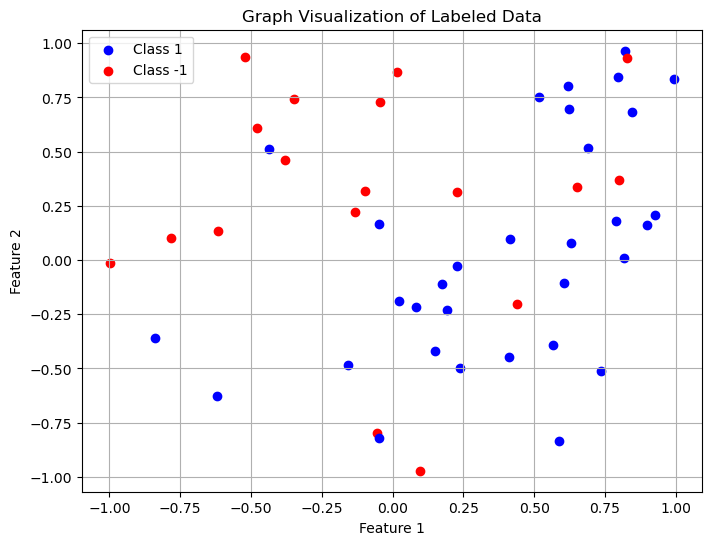

In [5]:
import random
import matplotlib.pyplot as plt
from math import exp  # Importing exp from the math module

def create_weighted_graph(X, labels, sigma):
    """Creates a weighted graph based on the input data points X."""
    n = len(X)
    W = [[0.0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            if i != j:
                # Compute weight using Gaussian kernel
                W[i][j] = exp(-sum((X[i][k] - X[j][k]) ** 2 for k in range(len(X[i]))) / (2 * sigma ** 2))
    
    return W

def compute_cut(S, T, W):
    """Computes the cut value for partitions S and T."""
    cut_value = 0
    for i in S:
        for j in T:
            cut_value += W[i][j]
    return cut_value

def min_cut(X, labeled_indices, labels, sigma):
    """Implements the Min-Cut algorithm for semi-supervised learning."""
    n = len(X)
    
    # Create weighted graph
    W = create_weighted_graph(X, labels, sigma)
    
    # Define labeled and unlabeled nodes
    labeled_nodes = labeled_indices
    unlabeled_nodes = [i for i in range(n) if i not in labeled_nodes]
    
    # Separate labeled data into two sets
    S = [i for i in labeled_nodes if labels[i] == 1]  # Positive class
    T = [i for i in labeled_nodes if labels[i] == -1] # Negative class
    
    # Compute the initial cut
    cut_value = compute_cut(S, T, W)
    
    return cut_value, S, T, unlabeled_nodes, W  # Return W

def label_unlabeled_data(X, labeled_indices, labels, sigma):
    """Labels the unlabeled data based on the Min-Cut algorithm."""
    cut_value, S, T, unlabeled_nodes, W = min_cut(X, labeled_indices, labels, sigma)  # Get W

    # Assign labels based on proximity to labeled nodes
    for i in unlabeled_nodes:
        # Check proximity to labeled classes
        if sum(W[i][s] for s in S) > sum(W[i][t] for t in T):
            labels[i] = 1  # Assign to positive class
        else:
            labels[i] = -1  # Assign to negative class

    return labels

def visualize_graph(X, labels):
    """Visualizes the labeled data points."""
    plt.figure(figsize=(8, 6))
    for i, point in enumerate(X):
        if labels[i] == 1:
            plt.scatter(point[0], point[1], color='blue', label='Class 1' if 'Class 1' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(point[0], point[1], color='red', label='Class -1' if 'Class -1' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    plt.title('Graph Visualization of Labeled Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    random.seed(0)
    X = [[random.uniform(-1, 1) for _ in range(2)] for _ in range(50)]
    
    # Assign labels to the first 10 points as a positive class (1) and the next 10 as a negative class (-1)
    labels = [1] * 10 + [-1] * 10 + [0] * 30  # 30 unlabeled points
    labeled_indices = list(range(20))  # First 20 points are labeled

    # Assign a value for sigma
    sigma = 0.5

    # Perform semi-supervised graph learning
    updated_labels = label_unlabeled_data(X, labeled_indices, labels, sigma)

    # Visualize the results
    visualize_graph(X, updated_labels)


## Graph Min-Cut Learning

Consider the complete graph whose vertices are associated with the points $ x_i, x_j $, and where the weight of the edge between $ x_i $ and $ x_j $ (for $ i \neq j $) is given. Let 

$$
f = [f_1, \ldots, f_N]^T 
$$

be the indicator vector for $ X_1 $:

$$
f_i = 
\begin{cases} 
1, & \text{if } x_i \in X_1 \\
0, & \text{otherwise}
\end{cases}
$$

There are two quantities of interest:

- The integral 

$$ 
\int_S p(s) \, ds 
$$ 

which measures the quality of the partition $ S $ in accordance with the weighted volume of the boundary.

- The expression 

$$ 
f^T L f 
$$ 

which measures the quality of the empirical partition in terms of its cut size.

When making graph constructions, it is necessary to consider choosing which graph to use from the following three graph types:

1. **k-nearest neighbor (kNN) graph**: The samples $ x_i $ and $ x_j $ are considered as neighbors if $ x_i $ is among the $ k $-nearest neighbors of $ x_j $ or $ x_j $ is among the $ k $-nearest neighbors of $ x_i $, where $ k $ is a positive integer and the $ k $-nearest neighbors are measured by the usual Euclidean distance.

2. **r-ball neighborhood graph**: The samples $ x_i $ and $ x_j $ are considered as neighbors if and only if 

$$ 
\|x_i - x_j\| < r 
$$ 

where the norm is the usual Euclidean norm, and $ r $ is a fixed radius. Two points are connected if their distance does not exceed the threshold radius $ r $. The $ r $-ball neighborhood graph is simply called the “$ r $-neighborhood” as well.

3. **Complete weighted graph**: There is an edge $ e = (i, j) $ between each pair of distinct nodes $ x_i $ and $ x_j$ (but no loops). This graph is not considered a neighborhood graph in general, but if the weight function is chosen such that the weights of edges between nearby nodes are high and the weights between points far away from each other are almost negligible, then the behavior of this graph should be similar to that of a neighborhood graph. One such weight function is the Gaussian weight function:

$$
w_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$

The k-nearest neighbor graph is a directed graph, while the r-ball neighborhood graph is an undirected graph. The weights used on neighborhood graphs usually depend on the distance of the vertices of the edge and are non-increasing. 

In other words, the weight $ w_{ij} $ of an edge $ (x_i, x_j) $ is given by:

$$
w_{ij} = f(\text{dist}(x_i, x_j))
$$

with a non-increasing weight. For example, we can use the Gaussian weight function:

$$
f(u) = \frac{1}{(2\pi \sigma^2)^{d/2}} \exp\left(-\frac{u^2}{2\sigma^2}\right)
$$

where the parameter $ \sigma > 0 $ defines the bandwidth of the Gaussian function.

It is usually assumed that for a measurable set $ S \subset \mathbb{R}^d $, the surface integral along a decision boundary $ S $ is given by:

$$
\mu(S) = \int_S p(s) \, ds
$$

This measure is called the “weighted boundary volume.” Narayanan et al. prove that the weighted boundary volume is approximated by:

$$
\mu(S) \approx \frac{\sqrt{\pi}}{N} f^T L f
$$

where $ L $ is the normalized graph Laplacian, $ f = [f_1, \ldots, f_{l+u}]^T $ is the weight vector function, and $ \sigma $ is the bandwidth of the edge weight Gaussian function.

For the classification problem, we are given the training sample data as 

$$
X = [x_1, \ldots, x_N],
$$

where $ x_i \in \mathbb{R}^d $ and $ N $ is the total number of training samples. 

Traditional graph construction methods typically decompose the graph construction process into two steps:

1. **Graph adjacency construction**: There are two main construction methods: $ r $-ball neighborhood and k-nearest neighbors.
  
2. **Graph weight calculation**: The three graph weight calculation approaches are:

   - **Heat Kernel**:
   $$
   w_{ij} = 
   \begin{cases} 
   e^{-\|x_i - x_j\|^2 / t}, & \text{if } x_i \text{ and } x_j \text{ are neighbors} \\
   0, & \text{otherwise}
   \end{cases}
   $$
   where $ t $ is the heat kernel parameter. Note that when $ t \to \infty $, the heat kernel will produce binary weights, and the graph constructed will be a binary graph:
   $$
   w_{ij} = 
   \begin{cases} 
   1, & \text{if } x_i \text{ and } x_j \text{ are neighbors} \\
   0, & \text{otherwise}
   \end{cases}
   $$

   - **Inverse Euclidean Distance**:
   $$
   w_{ij} = \|x_i - x_j\|^{-1}
   $$
   where $ \|x_i - x_j\|^2 $ is the Euclidean distance between $ x_i $ and $ x_j $.


In [6]:
# Import required libraries
import math
from typing import List

def create_weighted_graph(X: List[List[float]], sigma: float) -> List[List[float]]:
    """
    Creates a complete weighted graph using Gaussian weights.

    Parameters:
    - X: List of data points.
    - sigma: Bandwidth parameter for the Gaussian kernel.

    Returns:
    - W: Weighted adjacency matrix.
    """
    n = len(X)
    W = [[0.0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            if i != j:
                # Compute weight using Gaussian kernel
                W[i][j] = math.exp(-sum((X[i][k] - X[j][k]) ** 2 for k in range(len(X[i]))) / (2 * sigma ** 2))

    return W

def compute_degree(W: List[List[float]]) -> List[float]:
    """
    Computes the degree of each node based on the weighted adjacency matrix.

    Parameters:
    - W: Weighted adjacency matrix.

    Returns:
    - D: List of degrees for each node.
    """
    return [sum(W[i]) for i in range(len(W))]

def normalized_cut(W: List[List[float]], labeled_indices: List[int], labels: List[int]) -> List[int]:
    """
    Computes the normalized cut to classify unlabeled points.

    Parameters:
    - W: Weighted adjacency matrix.
    - labeled_indices: Indices of labeled points.
    - labels: Labels of labeled points.

    Returns:
    - predicted_labels: List of predicted labels for unlabeled points.
    """
    n = len(W)
    predicted_labels = [None] * n

    # Define the sets S and T based on the labeled points
    S = [i for i in labeled_indices if labels[i] == 1]
    T = [i for i in labeled_indices if labels[i] == 0]

    # Classify unlabeled points based on the cut values
    for i in range(n):
        if i not in labeled_indices:
            # Check proximity to labeled classes
            cut_S = sum(W[i][s] for s in S)
            cut_T = sum(W[i][t] for t in T)

            if cut_S > cut_T:
                predicted_labels[i] = 1  # Assign to positive class
            else:
                predicted_labels[i] = 0  # Assign to negative class

    return predicted_labels

def min_cut(X: List[List[float]], labeled_indices: List[int], labels: List[int], sigma: float) -> List[int]:
    """
    Main function to perform semi-supervised graph learning using min-cut.

    Parameters:
    - X: List of data points.
    - labeled_indices: Indices of labeled points.
    - labels: Labels of labeled points.
    - sigma: Bandwidth parameter for the Gaussian kernel.

    Returns:
    - predicted_labels: List of predicted labels for all points.
    """
    # Create weighted graph
    W = create_weighted_graph(X, sigma)
    
    # Compute normalized cut
    predicted_labels = normalized_cut(W, labeled_indices, labels)

    return predicted_labels

# Example usage:
X = [[1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [8.0, 8.0]]  # Sample data points
labeled_indices = [0, 1]  # Indices of labeled points
labels = [1, 1]  # Labels of the labeled points
sigma = 1.0  # Bandwidth parameter

predicted_labels = min_cut(X, labeled_indices, labels, sigma)
print("Predicted Labels:", predicted_labels)


Predicted Labels: [None, None, 1, 1]


## Local Linear Reconstruction and Leave-One-Out Cross-Validation

## Local Linear Reconstruction Coefficient

The local linear reconstruction coefficient is defined as:

$$
\xi(W) = -x_i - \sum_{j} w_{ij} x_j, \quad \text{subject to } \sum_{j} w_{ij} = 1, \forall i
$$

where $ w_{ij} = 0 $ if sample $ x_i $ and $ x_j $ are not neighbors.

## Leave-One-Out Cross-Validation (LOOCV)

If there are $ N $ samples in the original data, LOOCV uses each sample as a testing set separately, and the other $ N - 1 $ samples are used as a training set. Thus, LOOCV will yield $ N $ models, and the average classification accuracy of the final testing set of these $ N $ models serves as the performance index of the LOOCV classifier under this condition.

The LOOCV error is defined as the count of $ x \in L \cup U $ with a label different from that of its nearest neighbor. This is also the value of the cut. Let $ nn_{uv} $ be the indicator of “$ v $ is the nearest neighbor of $ u $” for the K-nearest neighborhood graph, and $ w_{uv} $ be the weight of the label of $ v $ when classifying $ u $ for K-averaged nearest neighborhood.

## Theorem

Suppose edge weights between example nodes are defined as follows: for each pair of nodes $ u $ and $ v $, define

$$
nn_{uv} = 
\begin{cases}
1, & \text{if } v \text{ is the nearest neighbor of } u \\
0, & \text{otherwise}
\end{cases}
$$

If we define:

$$
w(u, v) = nn_{uv} + nn_{vu} \quad \text{for K-nearest neighborhood graph}
$$

or 

$$
w(u, v) = nn_{uv} + nn_{vu} \quad \text{for K-averaged nearest neighborhood graph,
}$$

then for any binary labeling of the examples $ u \in U $, the cost of the associated cut is equal to the number of LOOCV mistakes made by the 1-nearest neighbor on $ L \cup U $. 

The above theorem implies that minimizing the cut for the K-nearest neighborhood graph or K-averaged nearest neighborhood graph is identical to minimizing the LOOCV error on $ L \cup U $.

## Graph Mincut Learning Algorithm

The following summarizes the steps in the Graph Mincut Learning Algorithm:

1. Construct a weighted graph $ G = (V, E, W) $, where $ V = L \cup U \cup \{ v^+, v^- \} $, and $ E \subseteq V \times V $. Associated with each edge $ e \in E $ is a weight $ w(e) $. The vertices $ v^+ $ and $ v^- $ are called the classification vertices, and all other vertices are the example vertices.

2. Set $ w(v, v^+) = \infty $ for all $ v \in L^+ $ and $ w(v, v^-) = \infty $ for all $ v \in L^- $.

3. The function assigning weights to edges between example nodes $ x_i, x_j $ is referred to as the edge weighting function $ w_{ij} $.

4. View $ v^+ $ as the source and $ v^- $ as the sink, treating the edge weights as capacities. Removing the edges in the cut partitions the graph into two sets of vertices: $ V^+ $ with $ v^+ \in V^+ $ and $ V^- $ with $ v^- \in V^- $. If there are multiple minimum cuts, the algorithm chooses the one such that $ V^+ $ is smallest (this is always well defined and easy to obtain from the flow).

5. Assign a positive label to all unlabeled examples in the set $ V^+ $ and a negative label to all unlabeled examples in the set $ V^- $.


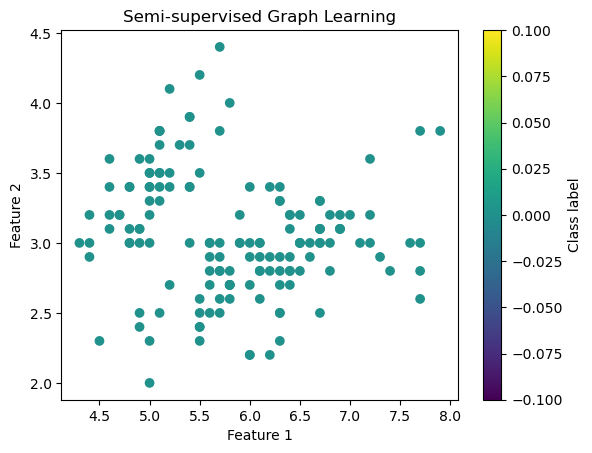

In [9]:
# Importing the Iris dataset
def load_iris():
    # Loading the Iris dataset from sklearn
    from sklearn import datasets
    iris = datasets.load_iris()
    return iris.data, iris.target

# Function to create a complete weighted graph
def create_weighted_graph(X, sigma):
    n = len(X)
    W = [[0.0] * n for _ in range(n)]  # Initialize weight matrix with zeros
    
    for i in range(n):
        for j in range(n):
            if i != j:
                # Calculate Euclidean distance
                distance = sum((X[i][k] - X[j][k]) ** 2 for k in range(len(X[i])))
                # Compute weight using Gaussian kernel
                W[i][j] = exp(-distance / (2 * sigma ** 2))
    return W

# Function to perform semi-supervised graph learning
def semi_supervised_graph_learning(W, labels, num_iterations=100):
    n = len(labels)
    for _ in range(num_iterations):
        for i in range(n):
            if labels[i] == -1:  # Unlabeled
                # Calculate the weighted average of neighbors' labels
                weighted_sum = 0.0
                total_weight = 0.0
                for j in range(n):
                    if labels[j] != -1:  # Only consider labeled neighbors
                        weighted_sum += W[i][j] * labels[j]
                        total_weight += W[i][j]
                
                # Assign label based on the weighted average
                if total_weight > 0:
                    labels[i] = weighted_sum / total_weight
    return labels

# Function to plot the learning curve
def plot_learning_curve(X, y, labeled_fraction):
    import matplotlib.pyplot as plt
    
    n_samples = len(y)
    labeled_size = int(n_samples * labeled_fraction)
    labels = [-1] * n_samples  # Initialize all as unlabeled

    # Randomly assign labels to a fraction of the dataset
    for i in range(labeled_size):
        labels[i] = y[i]
    
    # Create the weighted graph
    sigma = 1.0
    W = create_weighted_graph(X, sigma)

    # Perform semi-supervised learning
    updated_labels = semi_supervised_graph_learning(W, labels)

    # Plotting results
    plt.scatter(X[:, 0], X[:, 1], c=updated_labels, cmap='viridis')
    plt.title('Semi-supervised Graph Learning')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Class label')
    plt.show()

# Main execution
if __name__ == "__main__":
    X, y = load_iris()  # Load the Iris dataset
    labeled_fraction = 0.1  # Fraction of labeled data to use
    plot_learning_curve(X, y, labeled_fraction)  # Plot the learning curve


In [10]:
# Normalized Cut Image Segmentation

import random
import math

# Function to create a similarity graph from an image
def create_similarity_graph(image):
    height = len(image)
    width = len(image[0])
    W = {}
    for i in range(height):
        for j in range(width):
            W[(i, j)] = {}
            for di in range(-1, 2):
                for dj in range(-1, 2):
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < height and 0 <= nj < width:
                        # Compute similarity (inverse of difference)
                        W[(i, j)][(ni, nj)] = math.exp(-abs(image[i][j] - image[ni][nj])**2)
    return W

# Function to compute degree matrix D and weight matrix W
def compute_matrices(W):
    D = {}
    for u in W.keys():
        D[u] = sum(W[u].values())
    return D

# Function to compute the Laplacian matrix L
def compute_laplacian(W, D):
    L = {}
    for u in W.keys():
        L[u] = {}
        for v in W.keys():
            if u == v:
                L[u][v] = D[u]
            elif v in W[u]:
                L[u][v] = -W[u][v]
            else:
                L[u][v] = 0
    return L

# Function to perform power iteration for eigenvalue computation
def power_iteration(L, num_iterations=1000):
    # Initialize a random vector
    u = {k: random.random() for k in L.keys()}
    
    for _ in range(num_iterations):
        # Multiply by the Laplacian matrix
        u_next = {k: sum(L[k][v] * u[v] for v in L.keys()) for k in L.keys()}
        # Normalize the vector
        norm = math.sqrt(sum(val**2 for val in u_next.values()))
        for k in u_next.keys():
            u_next[k] /= norm
        u = u_next
    return u

# Function to segment the image using Normalized Cuts
def normalized_cut_segment(image):
    W = create_similarity_graph(image)
    D = compute_matrices(W)
    L = compute_laplacian(W, D)
    
    # Find the second smallest eigenvector
    u = power_iteration(L)
    
    # Create the segmentation
    threshold = sum(u.values()) / len(u)
    segmentation = [[1 if u[(i, j)] > threshold else 0 for j in range(len(image[0]))] for i in range(len(image))]
    
    return segmentation

# Example usage
if __name__ == "__main__":
    # Sample grayscale image (2D list)
    image = [
        [10, 10, 10, 50, 50, 50],
        [10, 10, 10, 50, 50, 50],
        [10, 10, 10, 50, 50, 50],
        [70, 70, 70, 10, 10, 10],
        [70, 70, 70, 10, 10, 10],
        [70, 70, 70, 10, 10, 10],
    ]
    
    segmentation = normalized_cut_segment(image)
    
    # Print segmentation result
    for row in segmentation:
        print(row)


[1, 1, 1, 1, 1, 1]
[1, 0, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0]
[1, 0, 1, 0, 1, 0]
[1, 1, 1, 0, 0, 0]


## Minimum Normalized Cut and Image Segmentation

## Minimum Normalized Cut

If a node in $ S = L^+ $ is viewed as a source $ s \in S $ and a node in $ T = L^- $ is viewed as a sink $ t \in T $, then minimizing $ Ncut(S, T) $ can be framed as a minimum $ s/t $ cut problem. One of the fundamental results in combinatorial optimization is that the minimum $ s/t $ cut problem can be solved by finding a maximum flow from the source $ s $ to the sink $ t $.

Loosely speaking, maximum flow represents the maximum “amount of water” that can be sent from the source to the sink, interpreting graph edges as directed “pipes” with capacities equal to the edge weights. The theorem of Ford and Fulkerson states that a maximum flow from $ s $ to $ t $ saturates a set of edges in the graph, dividing the nodes into two disjoint parts $ \{S, T\} $ corresponding to a minimum cut. Thus, min-cut and max-flow problems are equivalent, leading to the terminology of min-cut, max-flow, and min-cut/max-flow methods as referring to the same process.

Let $ f $ be an $ N = |L| $ dimensional indicator vector, defined as:

$$
f_i =
\begin{cases}
1, & \text{if node } i \text{ is in } L^+ \\
-1, & \text{otherwise}
\end{cases}
$$

Under the assumption that $ d_i = \sum_{j=1}^N w_{ij} $ is the total connection from node $ i $ to all other nodes, the normalized cut $ Ncut(S, T) $ can be rewritten as:

$$
Ncut(S, T) = \frac{cut(S, T)}{assoc(S, L)} + \frac{cut(S, T)}{assoc(T, L)} 
$$

where

$$
Ncut(S, T) = \sum_{(f_i > 0, f_j < 0)} -w_{ij} f_i f_j + \sum_{(f_i < 0, f_j > 0)} -w_{ij} f_i f_j
$$

This leads to the formulation:

$$
Ncut(f) = \sum_{(f_i > 0, f_j < 0)} w_{ij} + \sum_{(f_i < 0, f_j > 0)} w_{ij}
$$

It was shown that the minimization of normalized cut $ Ncut(S, T) = Ncut(f) $ is identical to minimizing the Rayleigh quotient $ R(f) $:

$$
\min Ncut(f) = \min R(u) = \frac{u^T (D - W) u}{u^T D u}
$$

subject to the normalization constraint $ f^T 1 = 0 $ and $ \| f \| = 1 $.

## Proposition 

The constrained minimization of the Rayleigh quotient can be formulated as a generalized eigenvalue problem:

$$
Lf = \lambda D f
$$

The solution is the second smallest generalized eigenvector of the matrix pencil $ (L, D) $, where $ L = D - W $ is the Laplacian of the graph $ G $.

## Image Segmentation Using Normalized Cuts

In image segmentation, a key problem is how to partition the domain $ I $ of an image into subsets and select the “right” one. Based on the graph-theoretic formulation of grouping, a minimum normalized cuts-based grouping approach was proposed by Shi and Malik. In this approach, the set of vertices is partitioned into disjoint sets $ V_1, V_2, \ldots, V_m $, where the similarity among vertices in a set $ V_i $ is high and low across different sets $ V_i, V_j $.

### Steps for Normalized Cuts Based Image Segmentation

1. Given an image or image sequence, set up a weighted graph $ G(V, E, W) $ and assign weights to the edges based on the similarity between connected nodes.
2. Solve the equation $ (D - W) u = \lambda D u $ for eigenvectors corresponding to the smallest eigenvalues.
3. Use the eigenvector with the second smallest eigenvalue to bipartition the graph.
4. Determine whether the current partition should be subdivided and recursively repartition the segmented parts if necessary.


## Unsupervised Graph Learning: Sparse Coding Method

In previous sections, we discussed the harmonic function method and the min-cut method for semi-supervised graph learning or graph construction. Now we turn to graph construction from only unlabeled training examples.

Given a set of $N$ $d$-dimension training examples $x_1, \ldots, x_N$ that constitute an $N \times d$ training matrix 

$$
X = [x_1, \ldots, x_N],
$$

typically \(d \ll N\). Let 

$$
y = [y_1, \ldots, y_d]^T
$$

be the target signal and 

$$
a = [a_1, \ldots, a_N]^T
$$

be a coefficient vector such that 

$$
e = y - Xa.
$$

The coefficient vector $a$ can be estimated via the optimization:

$$
\min \|y - Xa\|_2^2.
$$

The corresponding matrix equation is:

$$
B\alpha = y,
$$

where 

$$
B = [X, I_d] \in \mathbb{R}^{d \times (N + d)}
$$

with the $d \times d$ identity matrix $I_d$, and $\alpha \in \mathbb{R}^{d + N}$.

However, due to $d \ll N$, the matrix equation $B\alpha = y$ is under-determined, leading to infinite solutions for $\alpha$. Using the sparse coding method, the unique solution to the under-determined equation can be obtained by minimizing both the reconstruction error $\|e\|_2^2$ and the $\ell_1$-norm of the coefficient vector $\alpha$:

$$
\hat{\alpha} = \arg \min_\alpha \|\alpha\|_1 \quad \text{subject to } B\alpha = y.
$$

In unsupervised cases, the target $y$ is not available, and one can think of the $i$-th training sample $x_i$ as the target $y$ to transform the $\ell_1$ optimization problem to:

$$
\hat{\alpha}_i = \arg \min_\alpha \|\alpha\|_1 \quad \text{subject to } B\alpha = x_i,
$$

where 

$$
\alpha_i^T = [a_1(i), \ldots, a_{N-1}(i), e_1(i), \ldots, e_d(i)] \in \mathbb{R}^{N-1 + d},
$$

$$
B = [X \setminus x_i, I_d] \in \mathbb{R}^{d \times (N - 1 + d)}, \quad i = 1, \ldots, N,
$$

with 

$$
[X \setminus x_i] = [x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_N].
$$

Furthermore, graph weights are given by $w_{ij} = |a_j|$. This graph obtained by using sparse coding from the training samples $x_1, \ldots, x_N$ is called the $\ell_1$ graph.

## Algorithm: $\ell_1$ Directed Graph Construction Algorithm

1. **Input**: Column sample matrix $X = [x_1, \ldots, x_N]$.
2. **Initialization**: Normalize the training samples to have unit $\ell_2$ norm.
3. For $i = 1$ to $N$ do:
   4. Set $[X \setminus x_k] = [x_1, \ldots, x_{k-1}, x_{k+1}, \ldots, x_N] \in \mathbb{R}^{d \times (N-1)}$, and 
   $$
   B = [X \setminus x_k, I_d] \in \mathbb{R}^{d \times (d + N - 1)}.
   $$
   5. Solve the $\ell_1$ optimization problem:
   $$
   \hat{\alpha} = \arg \min_\alpha \|\alpha\|_1 \quad \text{subject to } B\alpha = x_k.
   $$
   6. Let $a = \hat{\alpha}_{1:N}$ and $e = \hat{\alpha}_{N+1:N+d-1}$.
   7. For $j = 1$ to $N - 1$ do:
      8. If $j < i$ then set $w_{ij} = |a_j|$,
      9. Else set $w_{ij} = |a_j - 1|$.
   10. End for.
11. End for.
12. **Output**: $W = [w_{ij}]_{i,j=1}^N$.


In [ ]:
import random

def normalize_samples(X):
    """
    Normalize the training samples to have unit L2 norm.
    """
    norm_X = []
    for x in X:
        norm_x = [val / (sum(val ** 2 for val in x) ** 0.5) for val in x]  # L2 norm for each element
        norm_X.append(norm_x)
    return norm_X

def solve_l1_optimization(B, target):
    """
    Solve the L1 optimization problem to find coefficients that minimize the
    L1 norm subject to B * alpha = target. This is a simple approach using
    a greedy algorithm since we are avoiding external libraries.
    """
    # Initialize alpha to zero
    alpha = [0] * (len(B[0]) - 1)
    residual = target[:]
    
    # Simple greedy L1 minimization
    for j in range(len(alpha)):
        if abs(residual[j]) > 1e-5:  # Only consider non-zero residuals
            alpha[j] = residual[j]  # Assign value to alpha
            residual = [residual[k] - B[k][j] * alpha[j] for k in range(len(residual))]  # Update residual

    return alpha

def l1_graph_construction(X):
    """
    Construct an L1 directed graph based on the provided training samples X.
    """
    N = len(X)  # Number of samples
    d = len(X[0])  # Dimension of each sample
    W = [[0] * N for _ in range(N)]  # Initialize weight matrix
    
    # Step 1: Normalize the training samples
    X_normalized = normalize_samples(X)

    # Step 2: Build the graph
    for i in range(N):
        # Create matrix B without the i-th sample
        B = [X_normalized[j] for j in range(N) if j != i]
        B.append([1] * (N - 1) + [1] * d)  # Append identity part (Id)

        # Solve the L1 optimization problem
        target = X_normalized[i]
        alpha = solve_l1_optimization(B, target)

        # Step 3: Set weights
        for j in range(N):
            if j < i:
                W[i][j] = abs(alpha[j])  # Weight from i to j
            elif j > i:
                W[i][j] = abs(alpha[j - 1])  # Adjust index since we removed the i-th sample

    return W

# Example Usage
if __name__ == "__main__":
    # Generate random training samples
    N = 10  # Number of samples
    d = 5   # Dimension
    X = [[random.uniform(0, 1) for _ in range(d)] for _ in range(N)]

    # Construct the L1 graph
    W = l1_graph_construction(X)

    # Output the resulting weight matrix
    for row in W:
        print(row)
